In [236]:
import requests
from bs4 import BeautifulSoup
import os 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt 

In [22]:
import random
user_agent_list = [
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/22.0.1207.1 Safari/537.1",
"Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11",
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1092.0 Safari/536.6",
"Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1090.0 Safari/536.6",
"Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/19.77.34.5 Safari/537.1",
"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.9 Safari/536.5",
"Mozilla/5.0 (Windows NT 6.0) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.36 Safari/536.5",
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
"Mozilla/5.0 (Windows NT 5.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
"Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
"Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
"Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.0 Safari/536.3",
"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24",
"Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24"
]
UA = random.choice(user_agent_list)
headers = {'User-Agent': UA}
page_html = requests.get("http://space.bilibili.com/20165629/#!/video?keyword=&order=senddate&page=1&tid=0",headers = headers)
soup_html = BeautifulSoup(page_html.text,'lxml')
#这个不可以用伪装法取得
#必须要Seleuinm

In [23]:
#Selenium大法
list_links = []
title = []
click = []
time_b = []
import time
driver = webdriver.Chrome()
driver.implicitly_wait(30) 
driver.get("http://space.bilibili.com/20165629/#!/video?keyword=&order=senddate&page=1&tid=0")
for i in (range(8)):
    time.sleep(3)
    html_soup = BeautifulSoup(driver.page_source,'lxml')
    link_title = html_soup.find("div",{'id':'submit-video-list'}).find_all('a',class_ = "title")
    link_click = html_soup.find("div",{'id':'submit-video-list'}).find_all('span',class_ = 'play')
    link_time = html_soup.find("div",{'id':'submit-video-list'}).find_all('span',class_ = 'time')
    title.extend(link_title)
    click.extend(link_click)
    time_b.extend(link_time)
    
    elem_blil = driver.find_element_by_class_name("sp-pager-next")
    elem_blil.click()
    #for i in range(1):
    #title = (link_title[0].get("title"))
    #click = (link_click[0].get_text())
    #time = (link_time[0].get_text())
    #zip_content = zip(title,click,time) 
    #links_single_page = html_soup.find("div",{"id":"submit-video-list"}).find_all("a",class_ = "cover")
    #list_links.extend(list(links_single_page))
    

In [24]:
a = list(map(lambda x:x.get_text(),title))
b = list(map(lambda x:x.get_text(),click))
c = list(map(lambda x:x.get_text(),time_b))

In [25]:
import pandas as pd
import numpy as np
general_data = pd.DataFrame(list(zip(a,b,c)),columns = ["title","click",'time'])

In [192]:
general_data

,title,click,time,classification
0,【这一周 第⑥集】“皮皮虾号”初问世，“四胞胎”引大风波,15000.0,2017-05-01,5
1,【羡慕-小曾】全网MV首发 让别人的羡慕真正来自心底,8194.0,2017-05-01,1
2,你没看错，这首《一带一路》的确是首老挝歌曲,27000.0,2017-05-01,0
3,海南酷炫90岁阿婆，既会玩泥巴又会唱民谣【了不起的匠人第二季-01】,5799.0,2017-05-01,1
4,【前方高能】绝对不是美国大片！,63000.0,2017-05-01,0
5,是什么让美国沉默，局座老泪纵横！【向上工厂】,32000.0,2017-04-30,0
6,敢不敢和共青团中央一起搞事情？,47000.0,2017-04-30,1
7,有人把航母命名为“皮皮虾号”？【国防部例行记者会 0428】,460000.0,2017-04-29,0
8,《海峡两岸》两集 20170425-26 国产航母下水 比辽宁舰强在哪？,50000.0,2017-04-28,5
9,张艺兴：努力努力再努力！【青年发展大家谈】,12000.0,2017-04-28,3


In [27]:
click_clean_1 = list(map(lambda x:float(x[0]), general_data.click.str.split("万")))
click_clean_2 = []

for i in click_clean_1:
    if i <= 100:
        k = i * 10000
        click_clean_2.append(k)
    else:
        click_clean_2.append(i)

In [28]:
general_data["click"] = click_clean_2

In [29]:
import time
print(str(time.localtime().tm_mon) + '-' + str(time.localtime().tm_mday))

5-2


In [30]:
time_clean = general_data.time[5:].str.split("天")

In [31]:
time_clean_2 = []
for i in time_clean:
    if len(i) == 2:
        time_clean_2.append(i[0])
    else:
        time_clean_2.append(i[0])
time_clean_3 = []
for i in time_clean_2:
    try:
        k = int(i)
        k = 32 - k
        if k < 10:
            k = "04" + "-" + str("0" + str(k))
        else:
            k = "04" + "-" + str(k)
        time_clean_3.append(k)
    except:
        time_clean_3.append(i)

In [32]:
time_clean_3

['04-30',
 '04-30',
 '04-29',
 '04-28',
 '04-28',
 '04-28',
 '04-27',
 '04-26',
 '04-26',
 '04-26',
 '04-26',
 '04-25',
 '04-25',
 '04-25',
 '04-25',
 '04-25',
 '04-25',
 '04-25',
 '04-25',
 '04-25',
 '04-24',
 '04-24',
 '04-24',
 '04-23',
 '04-23',
 '13小时前',
 '22小时前',
 '22小时前',
 '23小时前',
 '04-31',
 '04-30',
 '04-30',
 '04-29',
 '04-28',
 '04-28',
 '04-28',
 '04-27',
 '04-26',
 '04-26',
 '04-26',
 '04-26',
 '04-25',
 '04-25',
 '04-25',
 '04-25',
 '04-25',
 '04-25',
 '04-25',
 '04-25',
 '04-25',
 '04-24',
 '04-24',
 '04-24',
 '04-23',
 '04-23',
 '04-22',
 '04-21',
 '04-21',
 '04-21',
 '04-20',
 '04-20',
 '04-19',
 '04-18',
 '04-18',
 '04-18',
 '04-18',
 '04-18',
 '04-18',
 '04-18',
 '04-17',
 '04-17',
 '04-16',
 '04-15',
 '04-14',
 '04-14',
 '04-14',
 '04-14',
 '04-13',
 '04-13',
 '04-13',
 '04-12',
 '04-11',
 '04-11',
 '04-11',
 '04-11',
 '04-22',
 '04-21',
 '04-21',
 '04-21',
 '04-20',
 '04-20',
 '04-19',
 '04-18',
 '04-18',
 '04-18',
 '04-18',
 '04-18',
 '04-18',
 '04-18',
 '04-17',


In [42]:
general_data['time'][5:] = time_clean_3

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
general_data_1 = general_data

In [226]:
general_data.to_pickle("CYL.pickle")

In [ ]:
#top_3 = list(map(str,general_data.time[0:3]))
#top_3 = list(map(lambda x:"04-" + str(x), top_3))

In [ ]:
#general_data['time'][0:3] = top_3

In [51]:
time = list(map(lambda x:"2017-" + x,general_data['time'][0:475]))
general_data["time"][0:475] = time
general_data['click']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0       15000.0
1        8194.0
2       27000.0
3        5799.0
4       63000.0
5       32000.0
6       47000.0
7      460000.0
8       50000.0
9       12000.0
10       5322.0
11      89000.0
12      53000.0
13      16000.0
14      13000.0
15      33000.0
16     529000.0
17      18000.0
18      72000.0
19      10000.0
20       6089.0
21     269000.0
22      14000.0
23       7947.0
24      14000.0
25      33000.0
26      73000.0
27      85000.0
28      19000.0
29      18000.0
         ...   
450    124000.0
451    103000.0
452    130000.0
453     16000.0
454     14000.0
455     25000.0
456     39000.0
457      8892.0
458     39000.0
459    144000.0
460     43000.0
461     12000.0
462     37000.0
463    521000.0
464     15000.0
465     14000.0
466     65000.0
467      6561.0
468      3819.0
469      3694.0
470     33000.0
471    212000.0
472     20000.0
473    493000.0
474     38000.0
475      2659.0
476      4607.0
477      5344.0
478      7913.0
479      2605.0
Name: click, dtype: floa

In [53]:
general_data.to_pickle("CYL.pickle")

In [ ]:
import matplotlib.pyplot as plt
general_data.plot()
plt.show()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

# Create a trace
trace = go.Scatter(
    x = general_data['time'],
    y = general_data['click'],
    mode = 'markers',
    marker= dict(size= 14,
                 line= dict(width=1),
                 opacity= 0.3),
                 text= general_data['title']) # The hover text goes here... 

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

In [109]:
general_data = general_data.drop_duplicates()
general_data = general_data.reset_index()

In [113]:
general_data.drop("index",axis = 1,inplace = True)

In [314]:
general_data

,title,click,time,classification
0,【这一周 第⑥集】“皮皮虾号”初问世，“四胞胎”引大风波,15000.0,2017-05-01,5
1,【羡慕-小曾】全网MV首发 让别人的羡慕真正来自心底,8194.0,2017-05-01,1
2,你没看错，这首《一带一路》的确是首老挝歌曲,27000.0,2017-05-01,0
3,海南酷炫90岁阿婆，既会玩泥巴又会唱民谣【了不起的匠人第二季-01】,5799.0,2017-05-01,1
4,【前方高能】绝对不是美国大片！,63000.0,2017-05-01,0
5,是什么让美国沉默，局座老泪纵横！【向上工厂】,32000.0,2017-04-30,0
6,敢不敢和共青团中央一起搞事情？,47000.0,2017-04-30,1
7,有人把航母命名为“皮皮虾号”？【国防部例行记者会 0428】,460000.0,2017-04-29,0
8,《海峡两岸》两集 20170425-26 国产航母下水 比辽宁舰强在哪？,50000.0,2017-04-28,5
9,张艺兴：努力努力再努力！【青年发展大家谈】,12000.0,2017-04-28,3


In [164]:
with open("title.txt",'w') as f:
    for line in general_data['title']:
        f.write(line + "\n")

In [165]:
list_title = []
with open("title.txt",'r') as f:
    for line in f.readlines():
        list_title.append(line)

list_segwords = []
list_segkeywords = []
import jieba
import jieba.analyse

for line in list_title:
    seg_list = jieba.cut(line,cut_all = False)
    list_segwords.append((" ".join(seg_list)))
    
    tags = jieba.analyse.extract_tags(line, topK=3)
    list_segkeywords.append("".join(tags))

In [166]:
with open("segwords.txt","w") as f:
    for line in list_segwords:
        f.write(line)

In [167]:
import time            
import re            
import os    
import sys  
import codecs  
import shutil  
from sklearn import feature_extraction    
from sklearn.feature_extraction.text import TfidfTransformer    
from sklearn.feature_extraction.text import CountVectorizer

if __name__ == "__main__":
    corpus = []
    for line in open("segwords.txt",'r').readlines():
        print(line)
        corpus.append(line.strip())
    time.sleep(5)
    
    vectorizer = CountVectorizer()
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
    word = vectorizer.get_feature_names()
    weight = tfidf.toarray()

【 这 一周   第 ⑥ 集 】 “ 皮皮虾 号 ” 初 问世 ， “ 四胞胎 ” 引大 风波 

【 羡慕 - 小 曾 】 全网 MV 首发   让 别人 的 羡慕 真正 来自 心底 

你 没 看错 ， 这首 《 一带 一路 》 的确 是 首 老挝 歌曲 

海南 酷炫 90 岁 阿婆 ， 既会 玩 泥巴 又 会 唱 民谣 【 了不起 的 匠人 第二季 - 01 】 

【 前方 高能 】 绝对 不是 美国 大片 ！ 

是 什么 让 美国 沉默 ， 局座 老泪纵横 ！ 【 向上 工厂 】 

敢不敢 和 共青团中央 一起 搞 事情 ？ 

有人 把 航母 命名 为 “ 皮皮虾 号 ” ？ 【 国防部 例行 记者会   0428 】 

《 海峡两岸 》 两集   20170425 - 26   国产 航母 下水   比 辽宁 舰强 在 哪 ？ 

张艺兴 ： 努力 努力 再 努力 ！ 【 青年 发展 大家 谈 】 

那些 年 ， 除了 奋斗 我 一无所有 【 中国 好 青年 】 

热烈祝贺 首艘 国产 航母 下水 圆满成功 

中国 第二艘 航空母舰 下水 仪式 

没有 知识产权 的 恐怖 世界 

《 防务 新 观察 》   20170422 - 23   日本 竭力 推动 半岛 开战   “ 趁火打劫 ” 包藏祸心 ？ 

【 赵毛熊 】 从 清水 富美加 引退 ， 看 日本 邪教 “ 幸福 科学 ” 的 无孔不入 

【 局座 泪奔 完整版 】 外敌 说 我们 还 能 抵抗 ， 可公知 大 V 说 我们 … … 

【 这 一周   第 ⑤ 集 】 这周 的 新闻 有喜有忧 ， 我们 都 要 理性 对待 

万众 期待 中国 首艘 国产 航母 下水 《 海峡两岸 》 5 集     20170419 - 23 

我们 为什么 要 发展 航天 科技 ？ 

航天 日 为什么 是 今天 ？ 

局座 含泪 感叹 ： 我们 受 了 多少 窝囊气 才 有 今天 

【 MVP 收割 者 】 朱婷 欧冠 女排 大显神威 

黄菡 老师 给 你 发 了 一条 恋爱 寄语 ，   需者 立入 ， 非诚 勿扰 

看 不 明白 错过机会 ？ 没关系 ！ 团团 给 你 翻译 新闻联播 。 

【 无邪 旺 】 有 一种 造谣 叫 “ 轮子功 ” 

海军 治好 了

In [168]:
resName = "Bilibili_Result.txt"  
result = codecs.open(resName, 'w', 'utf-8')  
for j in range(len(word)):  
    result.write(word[j] + ' ')  
result.write('\r\n\r\n')

for i in range(len(weight)):  
    print(u"-------这里输出第",i,u"类文本的词语tf-idf权重------")    
    for j in range(len(word)):  
        result.write(str(weight[i][j]) + ' ')  
    result.write('\r\n\r\n')  
result.close()

-------这里输出第 0 类文本的词语tf-idf权重------
-------这里输出第 1 类文本的词语tf-idf权重------
-------这里输出第 2 类文本的词语tf-idf权重------
-------这里输出第 3 类文本的词语tf-idf权重------
-------这里输出第 4 类文本的词语tf-idf权重------
-------这里输出第 5 类文本的词语tf-idf权重------
-------这里输出第 6 类文本的词语tf-idf权重------
-------这里输出第 7 类文本的词语tf-idf权重------
-------这里输出第 8 类文本的词语tf-idf权重------
-------这里输出第 9 类文本的词语tf-idf权重------
-------这里输出第 10 类文本的词语tf-idf权重------
-------这里输出第 11 类文本的词语tf-idf权重------
-------这里输出第 12 类文本的词语tf-idf权重------
-------这里输出第 13 类文本的词语tf-idf权重------
-------这里输出第 14 类文本的词语tf-idf权重------
-------这里输出第 15 类文本的词语tf-idf权重------
-------这里输出第 16 类文本的词语tf-idf权重------
-------这里输出第 17 类文本的词语tf-idf权重------
-------这里输出第 18 类文本的词语tf-idf权重------
-------这里输出第 19 类文本的词语tf-idf权重------
-------这里输出第 20 类文本的词语tf-idf权重------
-------这里输出第 21 类文本的词语tf-idf权重------
-------这里输出第 22 类文本的词语tf-idf权重------
-------这里输出第 23 类文本的词语tf-idf权重------
-------这里输出第 24 类文本的词语tf-idf权重------
-------这里输出第 25 类文本的词语tf-idf权重------
-------这里输出第 26 类文本的词语tf-idf权重------
-------这里输出

In [185]:
from sklearn.cluster import KMeans  
clf = KMeans(n_clusters = 6)  
s = clf.fit(weight)  
#print(clf.labels_)  
i = 1
list_types = []
while i <= len(clf.labels_):  
    list_types.append(clf.labels_[i-1])
    i = i + 1

In [186]:
general_data["classification"] = list_types
#general_data[general_data["classification"] == 2]

In [187]:
general_data.to_pickle("CYL.pickle")

In [315]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

# Create a trace
trace = go.Scatter(
    x = general_data['time'],
    y = general_data['click'],
    mode = 'markers',
    marker= dict(size = 14,
                 color = general_data['classification'],
                 line= dict(width=1),
                 opacity= 1),
                 text= general_data['title']) # The hover text goes here... 

data = [trace]
# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

In [211]:
general_data = general_data.drop(general_data.index[240:245])

In [313]:
general_data.click.sum()

13011156.0

In [219]:
print(general_data[general_data['time'] == "2017-13小时前"])
print(general_data[general_data['time'] == "2017-22小时前"])
print(general_data[general_data['time'] == "2017-23小时前"])

                           title    click        time  classification
30  【这一周 第⑥集】“皮皮虾号”初问世，“四胞胎”引大风波  15000.0  2017-13小时前               5
                         title    click        time  classification
31  【羡慕-小曾】全网MV首发 让别人的羡慕真正来自心底   8194.0  2017-22小时前               1
32       你没看错，这首《一带一路》的确是首老挝歌曲  27000.0  2017-22小时前               0
                                 title   click        time  classification
33  海南酷炫90岁阿婆，既会玩泥巴又会唱民谣【了不起的匠人第二季-01】  5799.0  2017-23小时前               1


In [220]:
general_data = general_data.drop(general_data.index[30:33])

In [223]:
general_data = general_data.reset_index()

In [224]:
general_data.drop("index",axis = 1,inplace = True)

In [231]:
general_time = (general_data.groupby("time").apply(len))
general_topic_number = (general_data.groupby("classification").apply(len))
general_click_number = (general_data.groupby("classification").sum())

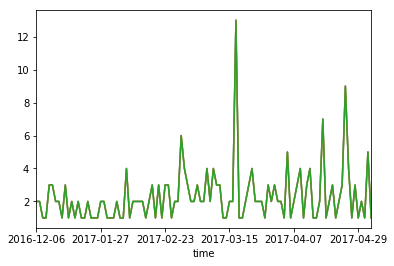

In [237]:
general_time.plot()
plt.show()

In [257]:
classification = pd.DataFrame(general_topic_number,columns = ["topic_number"])

In [258]:
classification = classification.join(general_click_number)

In [259]:
classification.index = ["国际政治，军事","科技，普法","电视剧热血尖兵","中国青年","青春25小时","局座相关"]

In [269]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
            x = classification.index,
            y = classification.topic_number,
    )

data = [trace1]
py.iplot(data, filename='basic-bar')

In [270]:
import plotly.plotly as py
import plotly.graph_objs as go

trace2 = go.Scatter(
            x = classification.index,
            y = classification.click,
    )

data = [trace2]
py.iplot(data, filename='Scatter_number')

In [278]:
general_time = (general_data.groupby("time").apply(len))

In [ ]:
with open("segwords.txt",'w') as f:
    for i in list_segwords:
        f.write(i)

In [282]:
list_videos = []
with open("list_videos.txt","r") as f:
    for i in f.readlines():
        i = i.strip("\n")
        list_videos.append(i)

In [284]:
test_page = requests.get("http://" + "www.bilibili.com/video/av7901523/")

In [286]:
list_total = []

In [290]:
import time

driver_1 = webdriver.Chrome()
driver_1.implicitly_wait(30) 
driver_1.get("http://" + "www.bilibili.com/video/av7901523/")
driver_1.implicitly_wait(30)
time.sleep(5)
test = driver_1.page_source

soup_test = BeautifulSoup(test,'lxml')
list_text = soup_test.find_all("p",class_= "text")
list_primary = list(map(lambda x:x.get_text(),list_text))
list_total.extend(list_primary)

In [ ]:
from lxml import etree
import re

selector = etree.HTML(test)
links = selector.xpath('//*[@id="bbComment"]/div[1]/div[2]/div[2]/span[1]/text()')
page_number = int(links[0][1:3])
print(page_number)

In [296]:
for i in range(45,170):
    elem = driver_1.find_element_by_link_text('下一页')
    elem.click()
    time.sleep(5)
    test_x = driver_1.page_source
    soup_test_x = BeautifulSoup(test_x,'lxml')
    list_text_x = soup_test_x.find_all("p",class_= "text")
    list_total.extend((list(map(lambda x:x.get_text(),list_text_x))))

In [303]:
len(list_total)

3563

In [301]:
with open("comment_1.txt","w") as f:
    for line in list_total:
        f.write(line + "\n")

In [305]:
Series_list_total = pd.Series(list_total)

In [306]:
Series_list_total.to_csv("comment_1.csv")

In [308]:
Series_list_total

0                     今天是周恩来同志逝世四十一周年，谨以此片，深切缅怀人民的 好 总 理！
1       这么多年了，世界即将发生重大变化？为何还要在这里相互唾弃相互谩骂？这能够发泄怒火吗？能够解决...
2                                             今日中国，可如你所愿？
3                   以前说这句话是戏谑，现在却想认真地说出来：苟利国家生死以，岂因祸福避趋之！
4                                           我真的是…大半夜看男神泪奔
5                              哭得一塌糊涂，我爱我的祖国！我爱中国！(´；ω；`)
6       中国 搞核弹的那批科学家是真的太厉害了，中国但是那是什么都没有，设备技术这两个一个都没，硬生...
7                                               我的祖国，长大了啊
8                                     看到图再配上字，就已经感动的一塌糊涂了
9                                             被老毛害死的。。。帮凶
10                                                我哭得稀里哗啦
11      短片太好了简直吧最好的最精彩最能代表种花家那些好基本都拍出来了 而且强烈推荐av512996...
12                                              我有一个强大的祖国
13                                                天佑中华！！！
14                                              山河犹在 国泰民安
15                                               我大中国，哭死了
16                                                  不自觉泪目
17      我妈说小时候